<a href="https://colab.research.google.com/github/syn294/H8_PTP_Final_Image/blob/master/final_project_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [0]:
filenames = os.listdir("../cats_and_dogs_filtered/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [0]:
train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
train_df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0
...,...,...
1995,dog.995.jpg,1
1996,dog.996.jpg,1
1997,dog.997.jpg,1
1998,dog.998.jpg,1


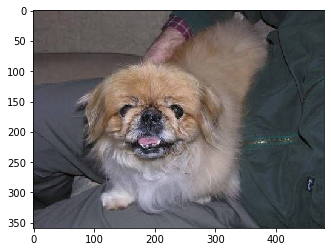

In [0]:
sample = random.choice(filenames)
image = load_img("../cats_and_dogs_filtered/train/"+sample)
plt.imshow(image)

In [0]:
str_cat = []
for n in train_df['category']:
    if n == 0:
        str_cat.append('cat')
    else:
        str_cat.append('dog')

In [0]:
train_df['category_str'] = str_cat

In [0]:
train_df

,filename,category,category_str
0,cat.0.jpg,0,cat
1,cat.1.jpg,0,cat
2,cat.10.jpg,0,cat
3,cat.100.jpg,0,cat
4,cat.101.jpg,0,cat
...,...,...,...
1995,dog.995.jpg,1,dog
1996,dog.996.jpg,1,dog
1997,dog.997.jpg,1,dog
1998,dog.998.jpg,1,dog


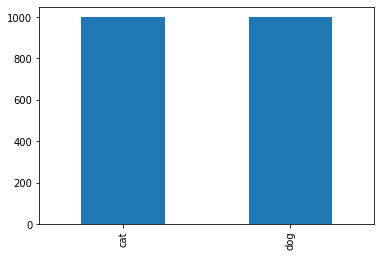

In [0]:
train_df['category_str'].value_counts().plot.bar()

In [0]:
filenames_val = os.listdir("../cats_and_dogs_filtered/validation")
categories_val = []
for filename in filenames_val:
    category = filename.split('.')[0]
    if category == 'dog':
        categories_val.append(1)
    else:
        categories_val.append(0)

In [0]:
validate_df = pd.DataFrame({
    'filename': filenames_val,
    'category': categories_val
})

In [0]:
str_cat_val = []
for n in validate_df['category']:
    if n == 0:
        str_cat_val.append('cat')
    else:
        str_cat_val.append('dog')
        
validate_df['category_str'] = str_cat_val

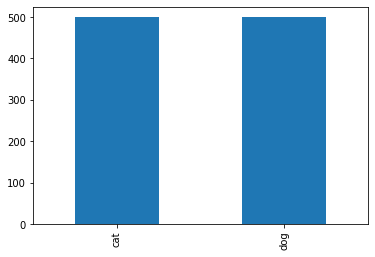

In [0]:
validate_df['category_str'].value_counts().plot.bar()

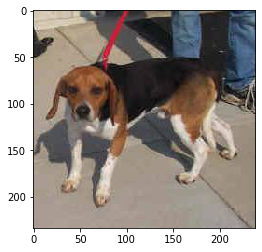

In [0]:
sample = random.choice(filenames_val)
image = load_img("../cats_and_dogs_filtered/validation/"+sample)
plt.imshow(image)

In [0]:
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE =(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
BATCH_SIZE = 16

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [0]:
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    "../cats_and_dogs_filtered/train/",
    x_col='filename',
    y_col='category_str',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 2000 validated image filenames belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
validation_gen = validation_datagen.flow_from_dataframe(
    validate_df,
    "../cats_and_dogs_filtered/validation",
    x_col='filename',
    y_col='category_str',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 1000 validated image filenames belonging to 2 classes.


In [0]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../cats_and_dogs_filtered/train/", 
    x_col='filename',
    y_col='category_str',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


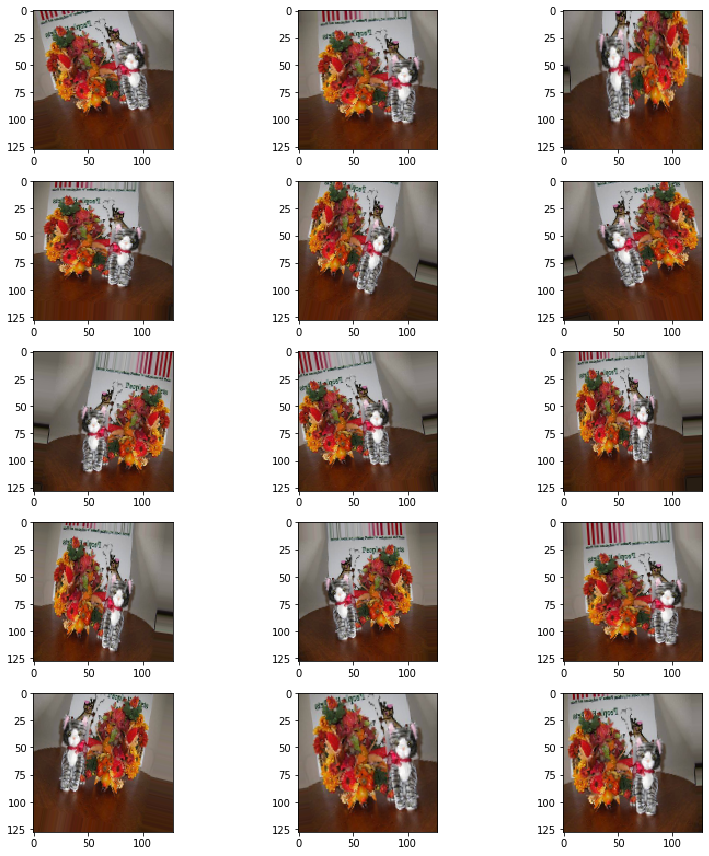

In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
del model
del history

In [0]:
model = tf.keras.models.Sequential([
    #Blok Pertama
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding="same", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    #blok kedua
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    #blok ketiga
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    
    #full connected 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
    
    
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)      

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [0]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10)

In [0]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
callbacks = [earlystop, learning_rate_reduction]

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [0]:
#epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_gen, 
    epochs=10,
    validation_data=validation_gen,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/10
125/125 [==============================] - 69s 549ms/step - loss: 0.7279 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 68s 547ms/step - loss: 0.6934 - accuracy: 0.4868 - val_loss: 0.6930 - val_accuracy: 0.4980
Epoch 3/10
124/125 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.4955
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
125/125 [==============================] - 67s 536ms/step - loss: 0.6934 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 4/10
125/125 [==============================] - 66s 531ms/step - loss: 0.6935 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 5/10
125/125 [==============================] - 66s 528ms/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 6/10
125/125 [==============================] - 67s 535ms/step - loss: 0.6933 - accuracy: 0.4950 - val_l

In [0]:
history = model.fit_generator(
    train_gen, 
    epochs=4,
    validation_data=validation_gen,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/4
62/62 [==============================] - 55s 884ms/step - loss: 0.5918 - accuracy: 0.6814 - val_loss: 0.6008 - val_accuracy: 0.6623
Epoch 2/4
62/62 [==============================] - 55s 890ms/step - loss: 0.5913 - accuracy: 0.6845 - val_loss: 0.6016 - val_accuracy: 0.6603
Epoch 3/4
62/62 [==============================] - 55s 890ms/step - loss: 0.5908 - accuracy: 0.6748 - val_loss: 0.6011 - val_accuracy: 0.6633
Epoch 4/4
62/62 [==============================] - 55s 892ms/step - loss: 0.5929 - accuracy: 0.6707 - val_loss: 0.5973 - val_accuracy: 0.6724


In [0]:
history = model.fit_generator(
    train_gen, 
    epochs=25,
    validation_data=validation_gen,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,
    callbacks=callbacks
)